In [1]:
import numpy as np
import math
import torch
from torch.autograd import Variable
from torch import nn, optim

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

from IPython import display

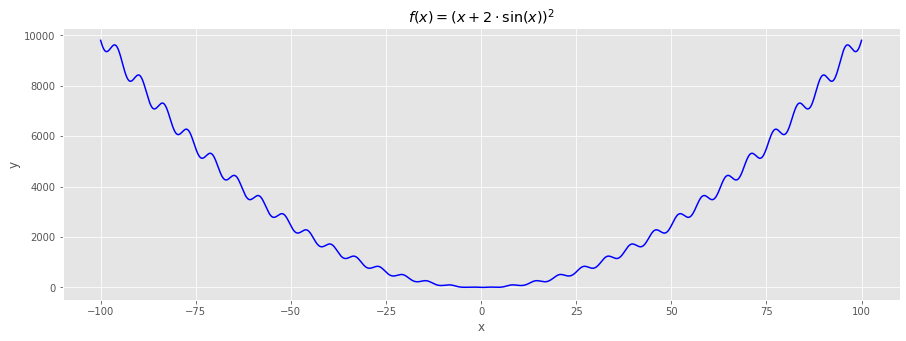

In [2]:
def f(x):
    return (x + 2 * math.sin(x))**2

x = np.linspace(-100,100,100*100)
y = np.array([f(i) for i in x])

plt.figure(figsize=(15,5))

plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.title(r'$f(x) = (x + 2 \cdot \sin(x))^{2}$')
plt.show()

In [3]:
def optimization(x0,optim_method,lr=0.01,eps=0.01,plot_loss=False,return_loss=False):
    x = Variable(torch.FloatTensor([x0]), requires_grad=True)

    if optim_method=='SGD':
        optimizer = optim.SGD([x],lr=lr)
    elif optim_method=='Adam':
        optimizer = optim.Adam([x],lr=lr)
    elif optim_method=='Adadelta':
        optimizer = optim.Adadelta([x])
    elif optim_method=='Adagrad':
        optimizer = optim.Adagrad([x],lr=lr)
    elif optim_method=='RMSprop':
        optimizer = optim.RMSprop([x],lr=lr)
    
    loss_history = []
    
    while True:
        optimizer.zero_grad()
        loss = (x + 2 * torch.sin(x))**2
        
        loss_history.append(loss.item())
        loss.backward(retain_graph=True)
        optimizer.step()
        
        if plot_loss:
            # Visualize
            display.clear_output(wait=True)
            plt.figure(figsize=(8, 6))

            plt.title(optim_method + " Loss Curve")
            plt.xlabel("iterations")
            plt.ylabel("loss")
            plt.plot(loss_history, 'b')
            plt.show()
        
        if len(loss_history)>1 and abs(loss_history[-1] - loss_history[-2])<eps:
            print('Minimum found:',x.item())
            if return_loss:
                return loss_history
            break

In [4]:
optimizers = ['SGD','Adam','Adadelta','Adagrad','RMSprop']

results = []

for o in optimizers:
    results.append(optimization(x0=5,optim_method=o,lr=0.01,eps=0.001,plot_loss=False,return_loss=True))

Minimum found: 4.218443393707275
Minimum found: 4.25105619430542
Minimum found: 4.25803279876709
Minimum found: 4.577891826629639
Minimum found: 4.233320236206055


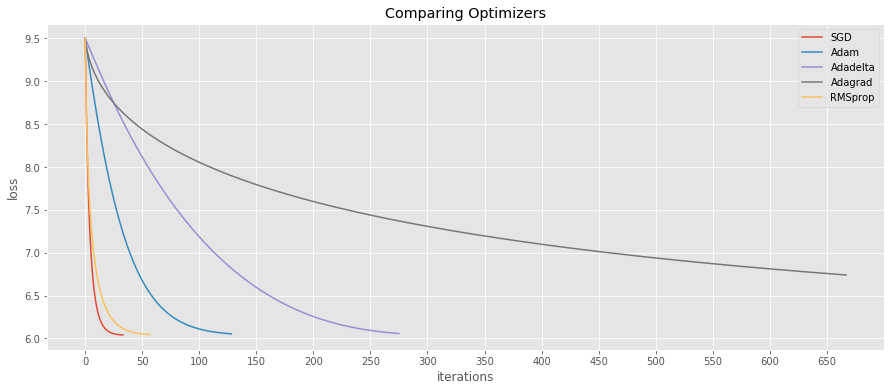

In [5]:
plt.figure(figsize=(15, 6))

plt.title("Comparing Optimizers")

plt.xlabel("iterations")
plt.ylabel("loss")

mx = 0
for each in results:
    mx = max(mx,len(each))
    plt.plot(each)

plt.xticks(list(range(0,mx,50)))

plt.legend(optimizers)
plt.show()